In [ ]:
# ------------------------------------------ IMPORTS --------------------------------------------------------------------------------------#
from tqdm import tqdm
import sys
import random
import os
import pandas as pd
from matplotlib import pyplot as plt
sys.path.append(os.path.abspath(".."))
from epstein_civil_violence.model import EpsteinCivilViolence

In [47]:
# -------------------- HELPER FUNCTIONS -----------------------------------------------------------------------------------------------------#
def calculate_intervals(activity):
    intervals = []
    old_item = activity[0]
    for item in activity[1:]:
        if item-old_item != 1:
            intervals.append(item-old_item)
        old_item=item
    return intervals

def preprocess_data(model_out):
    steps = model_out[model_out['active']>50].index.tolist()
    actives = model_out[model_out['active']>50]['active'].tolist()
    relevant_model_output = pd.DataFrame(
        {'step': steps,
        'actives': actives
        })
    return relevant_model_output

def calculate_interval_and_sizes(activity):
    intervals = []
    sizes = []
    current_size = 0
    old_item = activity.iloc[0]
    for i in tqdm(range(1, activity.shape[0])):
        item = activity.iloc[i]
        interval = item[0]-old_item[0]

        if interval != 1: # A new revolution has started
            # Information is added about previous revolution
            intervals.append(int(interval))
            current_size += item[1]
            sizes.append(int(current_size))
            current_size=0

        else: # The revolution is still going
            current_size += item[1]
        old_item=item
    return intervals, sizes

  0%|          | 0/2 [00:00<?, ?it/s]

C:\Users\frede\AppData\Local\Temp\ipykernel_19392\1434298617.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interval = item[0]-old_item[0]
C:\Users\frede\AppData\Local\Temp\ipykernel_19392\1434298617.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_size += item[1]
C:\Users\frede\AppData\Local\Temp\ipykernel_19392\1434298617.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_size += item[1]
100%|██████████

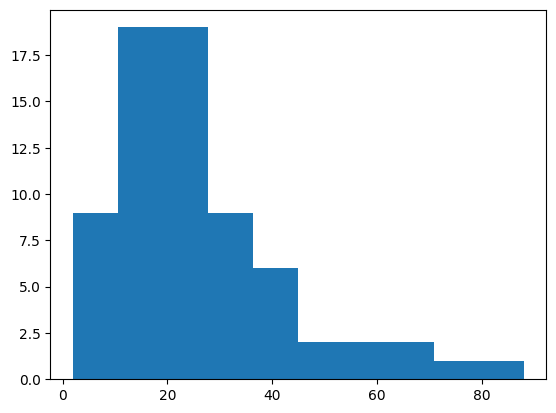

([22,
  14,
  16,
  42,
  25,
  23,
  28,
  32,
  25,
  14,
  27,
  12,
  20,
  18,
  22,
  7,
  88,
  9,
  54,
  11,
  69,
  29,
  24,
  12,
  9,
  53,
  12,
  24,
  41,
  22,
  16,
  19,
  14,
  15,
  19,
  24,
  15,
  41,
  44,
  22,
  16,
  37,
  28,
  17,
  27,
  13,
  32,
  24,
  67,
  23,
  53,
  10,
  21,
  25,
  20,
  12,
  72,
  2,
  32,
  28,
  19,
  10,
  8,
  10,
  20,
  59,
  28,
  2,
  36,
  41],
 [2194,
  395,
  121,
  137,
  360,
  200,
  306,
  174,
  313,
  254,
  165,
  219,
  71,
  297,
  282,
  64,
  126,
  360,
  74,
  333,
  69,
  309,
  114,
  201,
  126,
  242,
  185,
  378,
  51,
  375,
  71,
  326,
  64,
  116,
  80,
  299,
  2081,
  53,
  185,
  306,
  285,
  75,
  617,
  340,
  56,
  368,
  88,
  415,
  478,
  254,
  51,
  115,
  220,
  325,
  77,
  430,
  51,
  53,
  375,
  132,
  518,
  73,
  111,
  136,
  331,
  548,
  337,
  57,
  60,
  59])

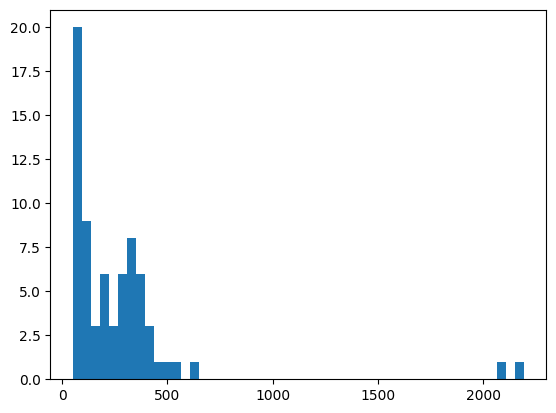

In [ ]:
def sample_runs(n_runs = 2, height=40, width=40, citizen_density=0.7, cop_density=0.04,citizen_vision=7, cop_vision=7,legitimacy=0.82,max_jail_term=30,max_iters=1000):
    
    intervals = []
    sizes = []

    for _ in tqdm(range(n_runs)):
        
        # Run the model 
        seed =  random.randint(1,100)
        model = EpsteinCivilViolence(
            height=height, 
            width=width, 
            citizen_density=citizen_density,
            cop_density=cop_density,
            citizen_vision=citizen_vision,
            cop_vision=cop_vision,
            legitimacy=legitimacy,
            max_jail_term=max_jail_term,
            max_iters=max_iters,
            seed = seed
        )
        model.run_model()

        # Get statistics
        model_out = model.datacollector.get_model_vars_dataframe()
        relevant_model_out = preprocess_data(model_out)
        interval, size = calculate_interval_and_sizes(relevant_model_out)
        intervals += interval
        sizes +=size

    plt.hist(intervals, bins=10)
    plt.show()

    plt.hist(sizes, bins=50)
    plt.show

    return intervals, sizes

sample_runs()

In [36]:
model = EpsteinCivilViolence(
    height=40,
    width=40,
    citizen_density=0.7,
    cop_density=0.04,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=30,
    max_iters=1000,
    seed = 42
)
model.run_model()
model_out = model.datacollector.get_model_vars_dataframe()



     step  actives
0       1      125
1       2      294
2       3      362
3       4      350
4       5      312
..    ...      ...
188   959       53
189   983       53
190   984       54
191   985       55
192   986       67

[193 rows x 2 columns] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 32, 33, 34, 35, 36, 47, 48, 49, 50, 96, 97, 98, 111, 112, 116, 117, 118, 130, 131, 132, 133, 134, 143, 144, 165, 166, 167, 184, 185, 186, 187, 209, 210, 211, 212, 213, 227, 228, 241, 242, 243, 244, 245, 246, 247, 248, 275, 276, 277, 278, 279, 280, 305, 306, 307, 308, 309, 310, 311, 312, 353, 354, 355, 356, 392, 393, 394, 395, 396, 397, 421, 422, 475, 476, 477, 478, 479, 480, 481, 506, 507, 508, 509, 510, 511, 512, 539, 540, 541, 542, 543, 544, 557, 558, 559, 560, 561, 583, 596, 608, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 653, 654, 655, 656, 657, 658, 675, 676, 677, 687, 688, 694, 695, 696, 697, 699, 716, 717, 718, 719, 720, 721, 722, 744, 746, 756, 757, 758, 765, 766, 778, 779, 780, 781, 796, 797

C:\Users\frede\AppData\Local\Temp\ipykernel_19392\3299507020.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(old_item[0])
C:\Users\frede\AppData\Local\Temp\ipykernel_19392\3299507020.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if item[0]-old_item[0] != 1:


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U1'), dtype('int64')) -> None

In [ ]:
from tqdm import tqdm
def preprocess_data(model_output):
    steps = model_out[model_out['active']>50].index.tolist()
    actives = model_out[model_out['active']>50]['active'].tolist()
    relevant_model_output = pd.DataFrame(
        {'step': steps,
        'actives': actives
        })
    return relevant_model_output

def calculate_interval_and_sizes(activity):
    intervals = []
    sizes = []
    current_size = 0
    old_item = activity.iloc[0]
    for i in tqdm(range(1, activity.shape[0])):
        item = activity.iloc[i]
        interval = item[0]-old_item[0]

        if interval != 1: # A new revolution has started
            # Information is added about previous revolution
            intervals.append(int(interval))
            current_size += item[1]
            sizes.append(int(current_size))
            current_size=0

        else: # The revolution is still going
            current_size += item[1]
        old_item=item
    return intervals, sizes

calculate_interval_and_sizes(boeb)

     step  actives
0       1      125
1       2      294
2       3      362
3       4      350
4       5      312
..    ...      ...
188   959       53
189   983       53
190   984       54
191   985       55
192   986       67

[193 rows x 2 columns] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 32, 33, 34, 35, 36, 47, 48, 49, 50, 96, 97, 98, 111, 112, 116, 117, 118, 130, 131, 132, 133, 134, 143, 144, 165, 166, 167, 184, 185, 186, 187, 209, 210, 211, 212, 213, 227, 228, 241, 242, 243, 244, 245, 246, 247, 248, 275, 276, 277, 278, 279, 280, 305, 306, 307, 308, 309, 310, 311, 312, 353, 354, 355, 356, 392, 393, 394, 395, 396, 397, 421, 422, 475, 476, 477, 478, 479, 480, 481, 506, 507, 508, 509, 510, 511, 512, 539, 540, 541, 542, 543, 544, 557, 558, 559, 560, 561, 583, 596, 608, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 653, 654, 655, 656, 657, 658, 675, 676, 677, 687, 688, 694, 695, 696, 697, 699, 716, 717, 718, 719, 720, 721, 722, 744, 746, 756, 757, 758, 765, 766, 778, 779, 780, 781, 796, 797

  0%|          | 0/192 [00:00<?, ?it/s]

C:\Users\frede\AppData\Local\Temp\ipykernel_19392\3007212158.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  interval = item[0]-old_item[0]
C:\Users\frede\AppData\Local\Temp\ipykernel_19392\3007212158.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_size += item[1]
C:\Users\frede\AppData\Local\Temp\ipykernel_19392\3007212158.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_size += item[1]
100%|██████████

([22,
  11,
  46,
  13,
  4,
  12,
  9,
  21,
  17,
  22,
  14,
  13,
  27,
  25,
  41,
  36,
  24,
  53,
  25,
  27,
  13,
  22,
  13,
  12,
  20,
  16,
  17,
  10,
  6,
  2,
  17,
  22,
  2,
  10,
  7,
  12,
  15,
  16,
  10,
  10,
  55,
  43,
  24],
 [2088,
  329,
  258,
  169,
  102,
  175,
  364,
  107,
  193,
  302,
  381,
  108,
  759,
  600,
  678,
  256,
  400,
  115,
  696,
  847,
  441,
  356,
  52,
  53,
  51,
  1075,
  377,
  198,
  118,
  265,
  57,
  734,
  63,
  57,
  164,
  116,
  240,
  195,
  592,
  321,
  381,
  749,
  739])